## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [67]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [68]:
dados = pd.read_csv('./housing.csv')
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
# Verificando valores únicos na variável
dados['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [70]:
# Criando uma variável para transformar os dados da coluna 'ocean_proximity' em dados numéricos com o mapeamento especifico
mapping = {
    'NEAR BAY': 1,
    '<1H OCEAN': 2,
    'INLAND': 3,
    'NEAR OCEAN': 4,
    'ISLAND': 5
}

dados['ocean_proximity_numeric'] = dados['ocean_proximity'].map(mapping)

# Criando uma nova coluna chamada 'ocean_proximity_numeric' com os valores numéricos correspondentes
dados['ocean_proximity'] = dados['ocean_proximity'].map(mapping)

dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_numeric
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,1


In [71]:
dados.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_numeric'],
      dtype='object')

In [72]:
dados.dtypes

longitude                  float64
latitude                   float64
housing_median_age         float64
total_rooms                float64
total_bedrooms             float64
population                 float64
households                 float64
median_income              float64
median_house_value         float64
ocean_proximity              int64
ocean_proximity_numeric      int64
dtype: object

In [73]:
dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_numeric
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.464729,2.464729
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.854226,0.854226
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,3.000000,3.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000,5.000000


In [74]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20640 non-null  float64
 1   latitude                 20640 non-null  float64
 2   housing_median_age       20640 non-null  float64
 3   total_rooms              20640 non-null  float64
 4   total_bedrooms           20433 non-null  float64
 5   population               20640 non-null  float64
 6   households               20640 non-null  float64
 7   median_income            20640 non-null  float64
 8   median_house_value       20640 non-null  float64
 9   ocean_proximity          20640 non-null  int64  
 10  ocean_proximity_numeric  20640 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 MB


In [75]:
dados.isnull().sum()

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms             207
population                   0
households                   0
median_income                0
median_house_value           0
ocean_proximity              0
ocean_proximity_numeric      0
dtype: int64

In [76]:
# tratando os dados nulos da variável 'total_bedrooms'
dados = dados.dropna(subset=['total_bedrooms'])

In [77]:
# Verificando se ainda há dados nulos
dados.isnull().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             0
population                 0
households                 0
median_income              0
median_house_value         0
ocean_proximity            0
ocean_proximity_numeric    0
dtype: int64

In [78]:
# Definindo as variáveis independentes e dependente
X = dados[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
            'ocean_proximity_numeric']]
y = dados['median_house_value']

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

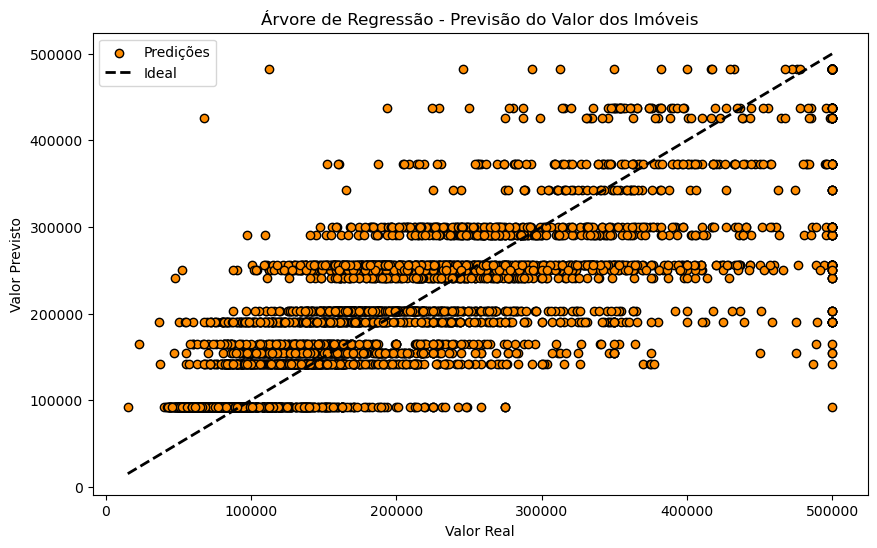

In [79]:
# Modelo 
arvore = DecisionTreeRegressor(max_depth=4)
arvore.fit(X_train, y_train)

# Predict
y_pred = arvore.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor="black", c="darkorange", label="Predições")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Árvore de Regressão - Previsão do Valor dos Imóveis")
plt.legend()
plt.show()


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [80]:
# Obtendo o caminho de poda baseado nos CCP-alphas
path = arvore.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Array de valores de alpha
impurities = path.impurities  # Array de impurezas das árvores correspondentes a cada alpha

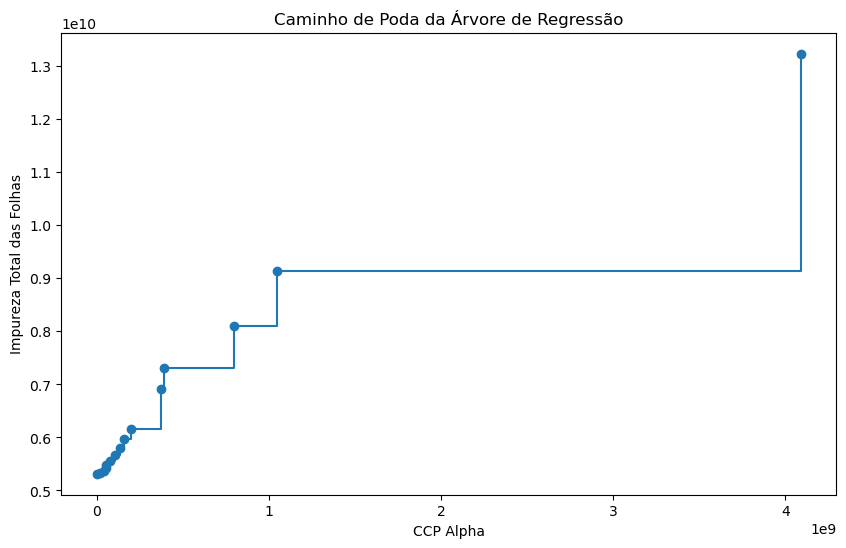

In [81]:
# Plotando os CCP-alphas contra as impurezas correspondentes
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Impureza Total das Folhas")
plt.title("Caminho de Poda da Árvore de Regressão")
plt.show()

In [82]:
# Treinando diferentes árvores para cada valor de CCP-alpha
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

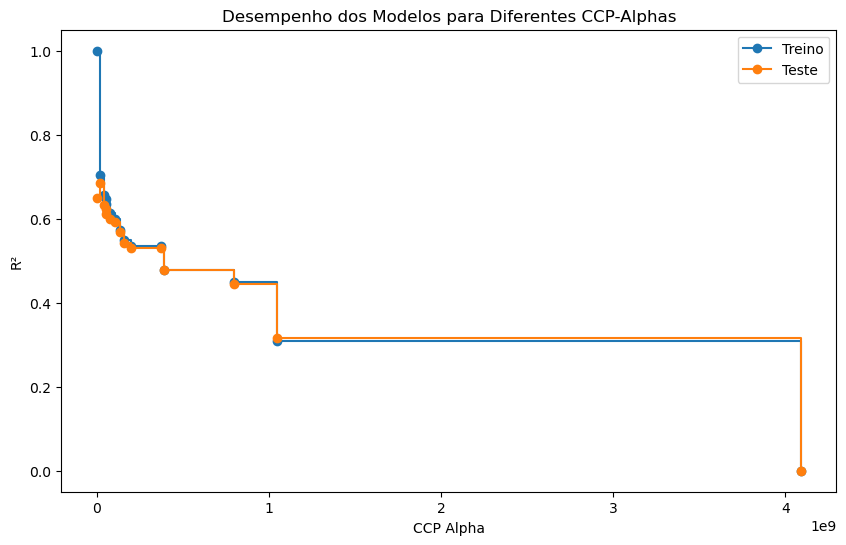

In [83]:
# Avaliando o desempenho de cada modelo
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Treino", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Teste", drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("R²")
plt.title("Desempenho dos Modelos para Diferentes CCP-Alphas")
plt.legend()
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [84]:
# Obtendo o caminho de poda baseado nos CCP-alphas
path = arvore.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Array de valores de alpha
impurities = path.impurities  # Array de impurezas das árvores correspondentes a cada alpha

In [85]:
# Lista para armazenar as árvores treinadas
arvores = []

# Treinando diferentes árvores para cada valor de CCP-alpha
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    arvores.append(model)

In [86]:
# Verificando o número de árvores treinadas e os alphas correspondentes
for i, model in enumerate(arvores):
    print(f"Árvore {i+1}: CCP Alpha = {ccp_alphas[i]}")

Árvore 1: CCP Alpha = 0.0
Árvore 2: CCP Alpha = 19398042.483295172
Árvore 3: CCP Alpha = 40635834.99180013
Árvore 4: CCP Alpha = 53726430.627437234
Árvore 5: CCP Alpha = 57304619.967262626
Árvore 6: CCP Alpha = 74780886.87541378
Árvore 7: CCP Alpha = 109167215.9178217
Árvore 8: CCP Alpha = 138256195.6964457
Árvore 9: CCP Alpha = 160890838.25139523
Árvore 10: CCP Alpha = 198280587.7959087
Árvore 11: CCP Alpha = 371958720.41808367
Árvore 12: CCP Alpha = 389656554.34095454
Árvore 13: CCP Alpha = 797000619.9673095
Árvore 14: CCP Alpha = 1046034282.0824785
Árvore 15: CCP Alpha = 4092358092.7826576


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [87]:
# Lista para armazenar os MSEs
mse_list = []

# Calculando o MSE para cada árvore
for i, model in enumerate(arvores):
    # Fazendo previsões
    y_pred = model.predict(X_test)
    # Calculando o MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print(f"Árvore {i+1}: CCP Alpha = {ccp_alphas[i]}, MSE = {mse}")

Árvore 1: CCP Alpha = 0.0, MSE = 4806510870.313678
Árvore 2: CCP Alpha = 19398042.483295172, MSE = 4298539758.74022
Árvore 3: CCP Alpha = 40635834.99180013, MSE = 5032065876.621618
Árvore 4: CCP Alpha = 53726430.627437234, MSE = 5153472842.334355
Árvore 5: CCP Alpha = 57304619.967262626, MSE = 5310532587.753673
Árvore 6: CCP Alpha = 74780886.87541378, MSE = 5476267187.679684
Árvore 7: CCP Alpha = 109167215.9178217, MSE = 5574355242.272376
Árvore 8: CCP Alpha = 138256195.6964457, MSE = 5915199408.783395
Árvore 9: CCP Alpha = 160890838.25139523, MSE = 6247266911.131144
Árvore 10: CCP Alpha = 198280587.7959087, MSE = 6438778663.190413
Árvore 11: CCP Alpha = 371958720.41808367, MSE = 6438778663.190413
Árvore 12: CCP Alpha = 389656554.34095454, MSE = 7153710400.89595
Árvore 13: CCP Alpha = 797000619.9673095, MSE = 7608731340.045521
Árvore 14: CCP Alpha = 1046034282.0824785, MSE = 9365226952.544601
Árvore 15: CCP Alpha = 4092358092.7826576, MSE = 13676390692.818264


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

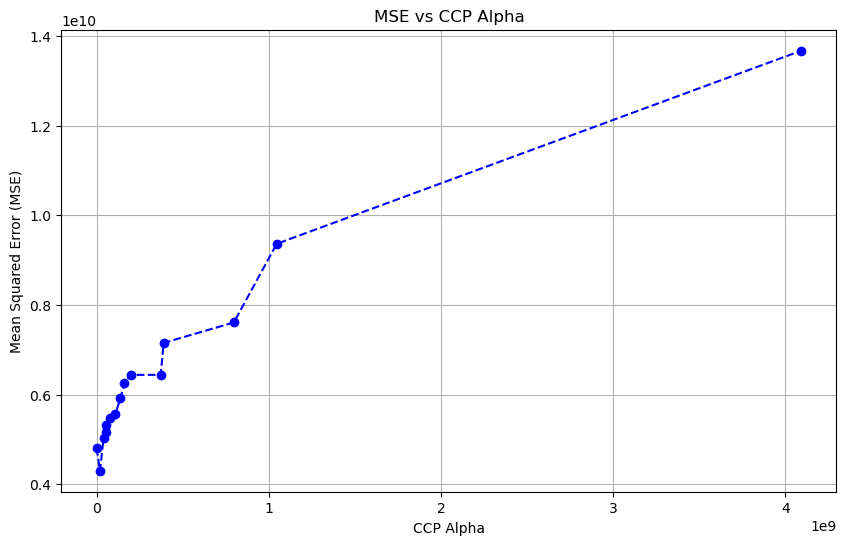

In [88]:
# Plotando o gráfico do MSE pelo Alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_list, marker='o', linestyle='--', color='b')
plt.xlabel("CCP Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs CCP Alpha")
plt.grid(True)
plt.show()

In [89]:
# Encontrando o alpha correspondente ao menor MSE
min_mse_index = mse_list.index(min(mse_list))
best_alpha = ccp_alphas[min_mse_index]

print(f'O melhor valor de CCP Alpha é {best_alpha} com um MSE de {min(mse_list)}')

O melhor valor de CCP Alpha é 19398042.483295172 com um MSE de 4298539758.74022


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [90]:
# Encontrando o índice do melhor CCP Alpha
min_mse_index = mse_list.index(min(mse_list))
best_alpha = ccp_alphas[min_mse_index]

# Recuperando a árvore correspondente ao melhor alpha
best_tree = arvores[min_mse_index]

# Calculando o R-quadrado da árvore no conjunto de teste
r2_score = best_tree.score(X_test, y_test)

print(f"O R-quadrado da árvore com CCP Alpha = {best_alpha} é {r2_score:.4f}")

O R-quadrado da árvore com CCP Alpha = 19398042.483295172 é 0.6857


### 7. Visualize esta árvore.

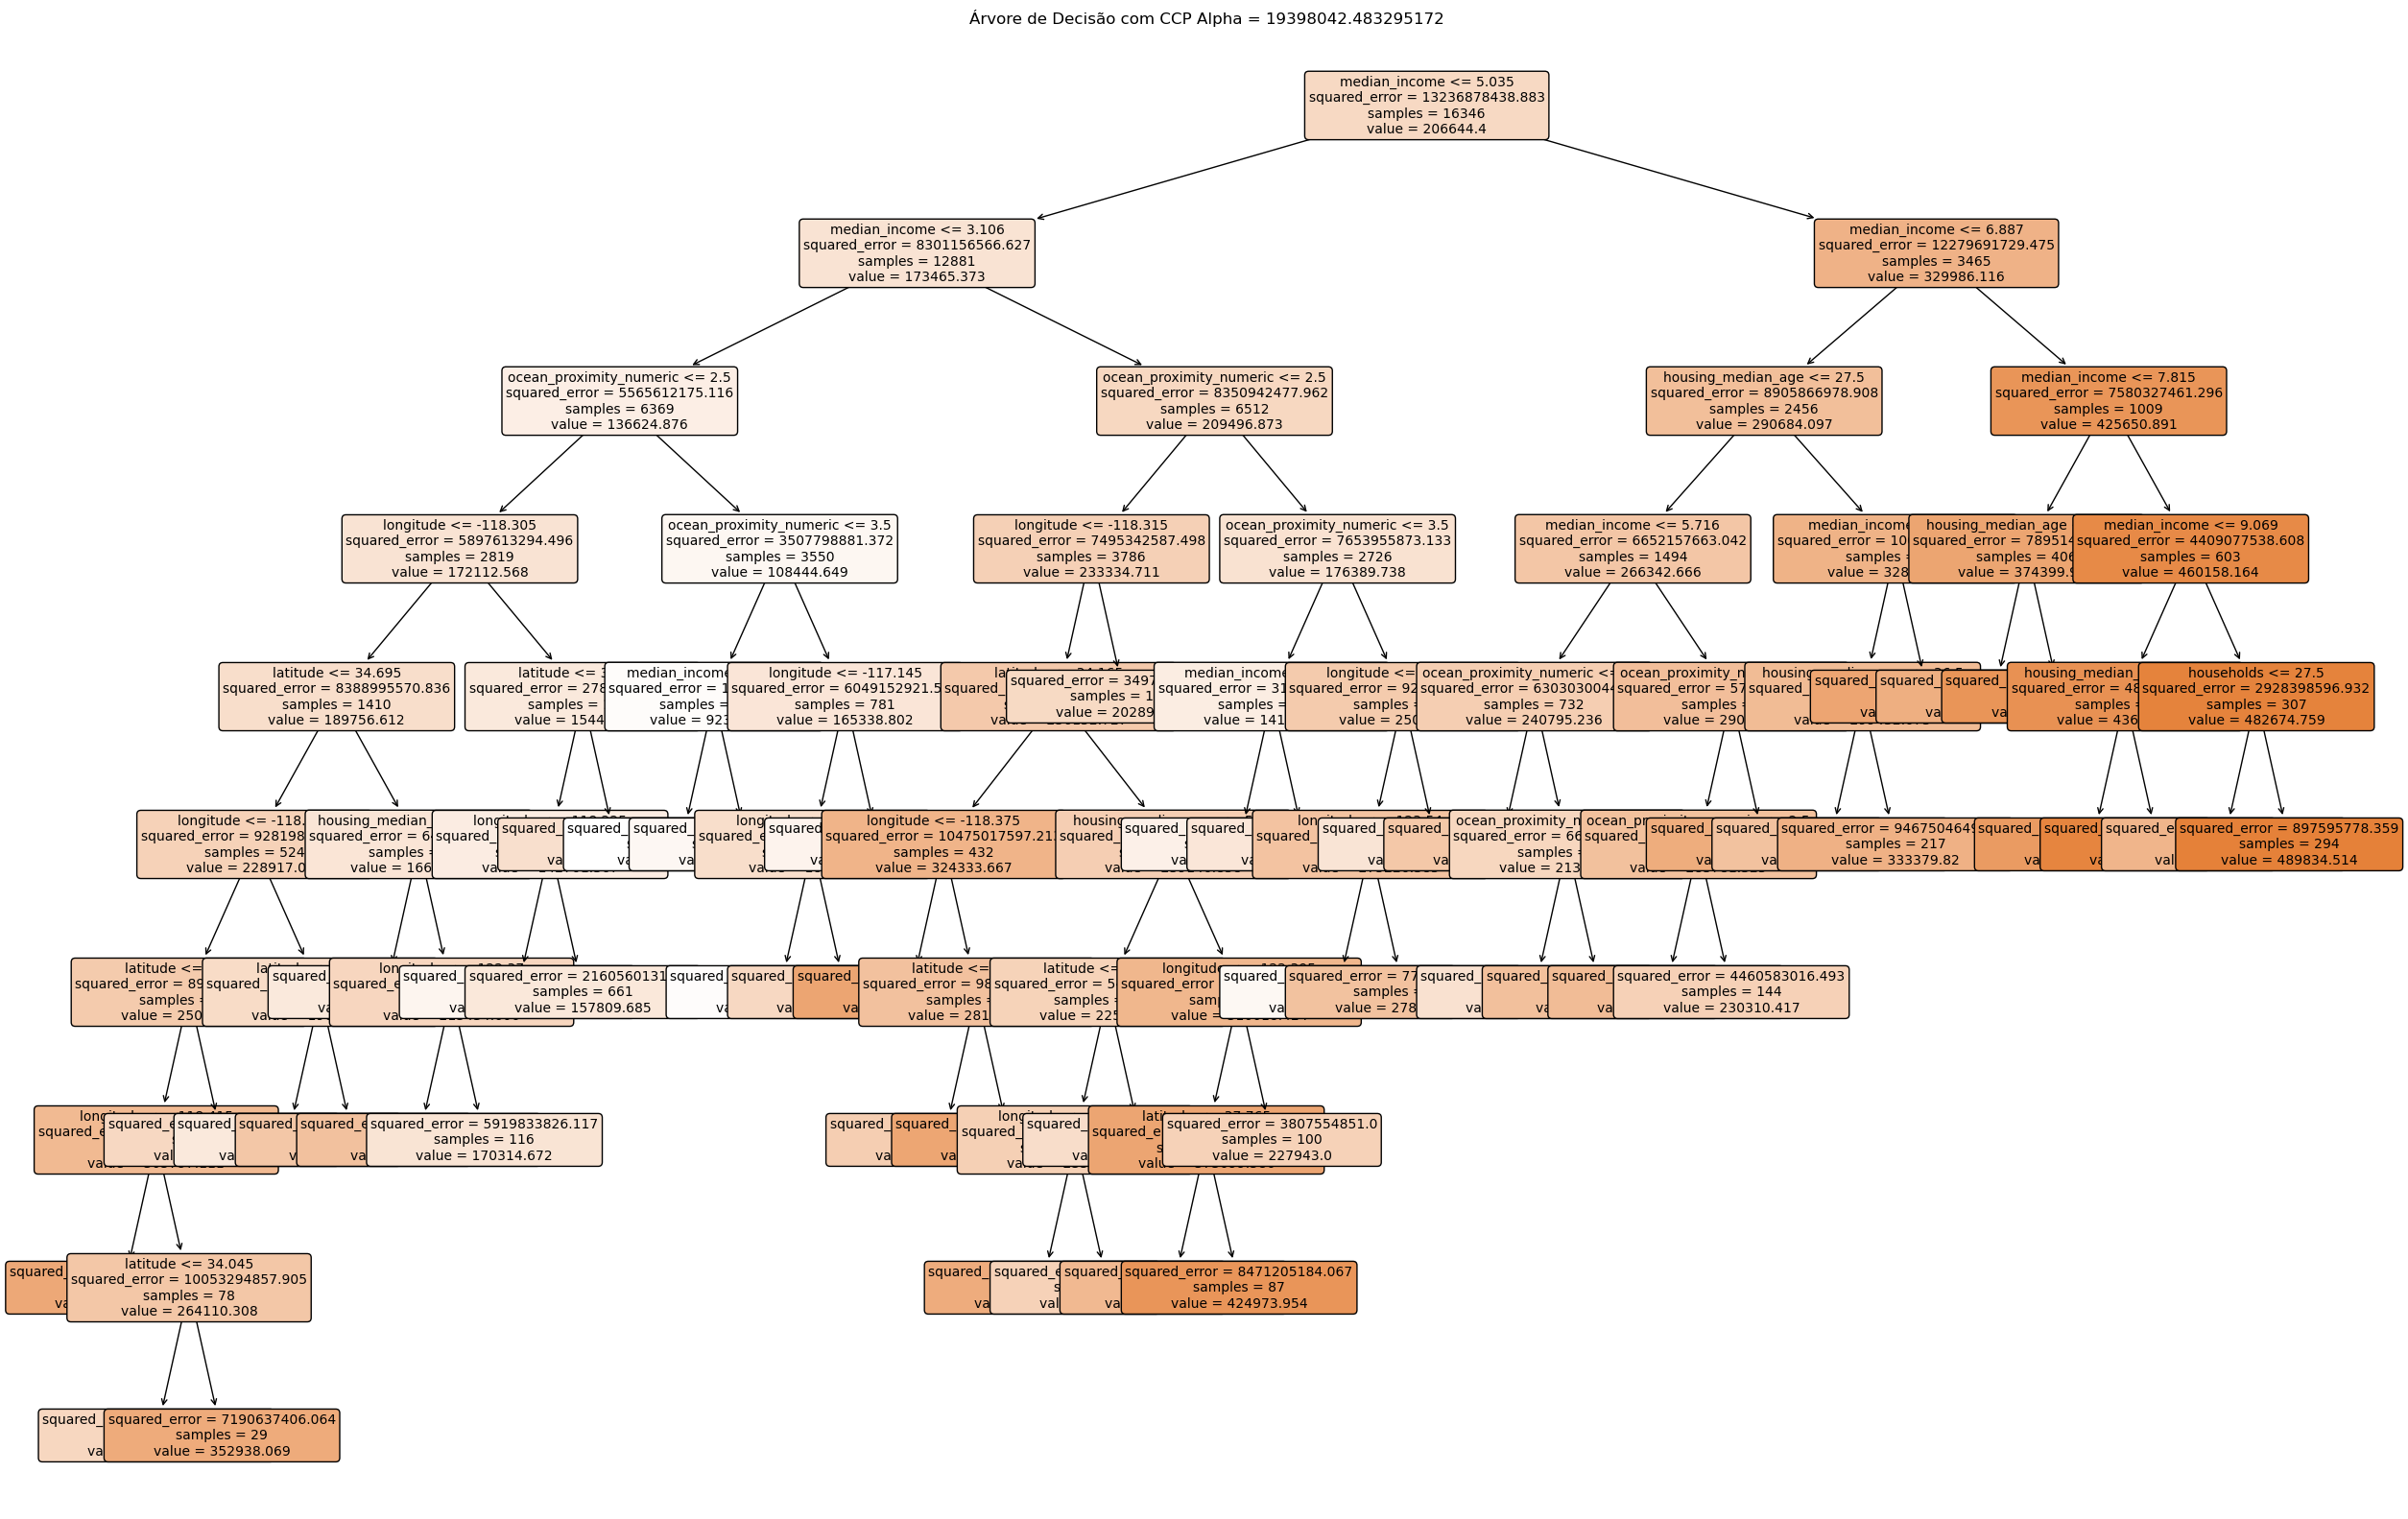

In [96]:
# Configurar o tamanho da figura para garantir que a árvore caiba na imagem
plt.figure(figsize=(30, 20))

# Visualizando a árvore correspondente ao melhor CCP Alpha
plot_tree(
    best_tree, 
    feature_names=X.columns,  # Nomes das variáveis
    filled=True,              # Preencher os nós com cores
    rounded=True,             # Bordas arredondadas para os nós
    fontsize=10               # Tamanho da fonte
)

plt.title(f"Árvore de Decisão com CCP Alpha = {best_alpha}")
plt.show()